# xylE dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_git_ssh')

import mavenn
import logomaker
import seaborn as sns
import re
import urllib

%matplotlib inline

# Summary 

The *xylE* sort-seq MPRA data of Belliveau et. al., 2018. The authors used fluoresence-activated cell sorting, followed by deep sequencing, to assay gene expression levels from the the *xylE* promoter in *E. coli*. *xylE* is a xylose/proton symporter involved in uptake of xylose. Note that the authors also performed several different experiments at multiple other *E. Coli* promoters, but this notebook is restricted to *xylE*. See Belliveau et al., 2018 for more details.

The authors performed their experiment by splitting the *xylE* promoter into three regions, where the subsequences of the *xylE* promoter were mutagenized. The authors subsequently FACS sorted these variant sequences from each region into 1 of 4 bins. Thus, each of the 3 regions was sorted into 4 bins, and each sequence is associated with counts in 4 of 12 total bins. This notebook takes the variant promoter sequences in each of the mutagenized regions and forms a full 150 bp xylE promoter sequence by putting the consensus sequence outside of the window where the sequences were mutagenized.

In the following three (raw) dataframes (corresponding to the 3 mutagenized *xylE* regions), the `'x'` column lists variant sequences, and the `'bin'` column  lists the number of read counts for each sequence (observed in 1 of 4 FACS bins). Each of the sequences in the raw dataframes have a value less than the full length of 150 bp. The final dataframe will have full 150 bp length sequences and their associated counts. The `'set'` column in final_df indicates whether each sequence is to assigned to the training set, the validation set, or the test set.

**Names**: ``'xylE'``

**Reference**: Nathan M Belliveau, Stephanie L Barnes, William T Ireland, Daniel L Jones, Michael J Sweredoski, Annie Moradian, Sonja Hess, Justin B Kinney, Rob Phillips. Systematic approach for dissecting the molecular mechanisms of transcriptional regulation in bacteria. [Proc Natl Acad Sci USA, 115, E4796–E4805 (2018).](https://doi.org/10.1073/pnas.1722055115)

# Download raw data
The following cell downloads each of the mutagenized regions into 3 pandas dataframes. Note that the urls will have to be updated to replace development to master after mavenn has been released to PyPI.

In [2]:
# Download 3 mutagenized regions of datset into pandas dataframes

# region 1 (library 1)
file_name = '20160710_xylE_MG1655_M9xylose_na_mut1_4bins_pymc.csv.gz'
url = f'https://github.com/jbkinney/mavenn/blob/development/mavenn/examples/datasets/raw/{file_name}?raw=true'

data_df_mut1 = pd.read_csv(url,  
                           compression='gzip',
                           index_col=[0])

# region 2 (library 2)
file_name = '20160710_xylE_MG1655_M9xylose_na_mut2_4bins_pymc.csv.gz'
url = f'https://github.com/jbkinney/mavenn/blob/development/mavenn/examples/datasets/raw/{file_name}?raw=true'

data_df_mut2 = pd.read_csv(url,  
                           compression='gzip',
                           index_col=[0])


# region 3 (library 3)
file_name = '20160710_xylE_MG1655_M9xylose_na_mut3_4bins_pymc.csv.gz'
url = f'https://github.com/jbkinney/mavenn/blob/development/mavenn/examples/datasets/raw/{file_name}?raw=true'

data_df_mut3 = pd.read_csv(url,  
                           compression='gzip',
                           index_col=[0])

/Users/tareen/miniconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


The following two cells give a preview of the raw dataset from mutagenized regions 1 and 2, respectively.

In [5]:
# the following snippet shows how these probability matrices were generated
# prob_mat_mut_3 = logomaker.alignment_to_matrix(sequences=data_df_mut3['x'].values,to_type='probability')
# prob_mat_mut_2 = logomaker.alignment_to_matrix(sequences=data_df_mut2['x'].values,to_type='probability')
# prob_mat_mut_1 = logomaker.alignment_to_matrix(sequences=data_df_mut1['x'].values,to_type='probability')

prob_mat_mut_3 = pd.read_csv('prob_mat_mut_3.csv')
prob_mat_mut_2 = pd.read_csv('prob_mat_mut_2.csv')
prob_mat_mut_1 = pd.read_csv('prob_mat_mut_1.csv')

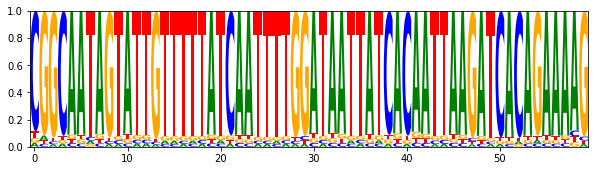

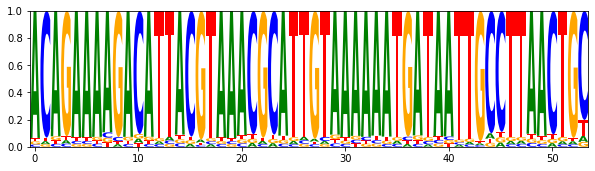

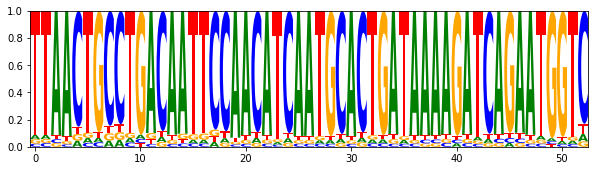

In [49]:
logo_mut_3 = logomaker.Logo(prob_mat_mut_3)
logo_mut_2 = logomaker.Logo(prob_mat_mut_2)
logo_mut_1 = logomaker.Logo(prob_mat_mut_1)


The following logos visualize the consensus sequences in each of the 3 libraries. The yellow highlighted regions will help with the formation of the consensus sequence string 2 cells below.

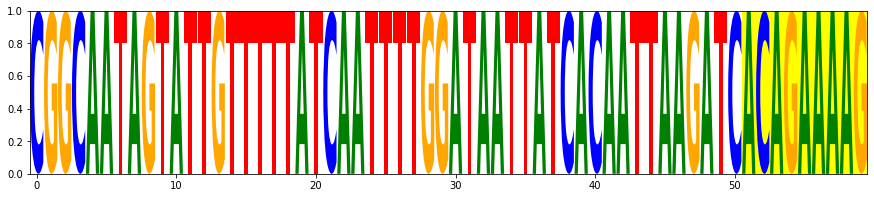

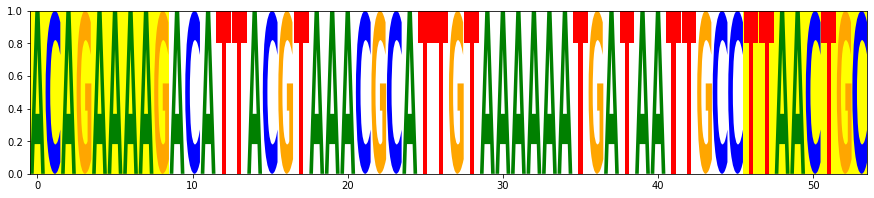

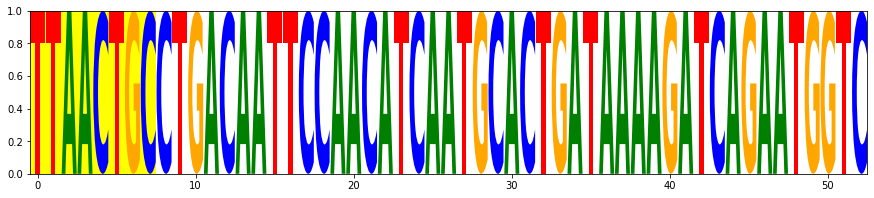

In [8]:
cons_seq_mut_3, _ = mavenn.src.utils.vec_data_to_mat_data(np.argmax(logo_mut_3.df.values,axis=1))
cons_mut_3_logo = logomaker.Logo(pd.DataFrame(cons_seq_mut_3,columns=['A','C','G','T']),figsize=(15,3))
cons_mut_3_logo.highlight_position_range(51,59)


cons_seq_mut_2, _ = mavenn.src.utils.vec_data_to_mat_data(np.argmax(logo_mut_2.df.values,axis=1))
cons_mut_2_logo = logomaker.Logo(pd.DataFrame(cons_seq_mut_2,columns=['A','C','G','T']),figsize=(15,3))
cons_mut_2_logo.highlight_position_range(0,8)
cons_mut_2_logo.highlight_position_range(46,53)

# one is closest to xylE gene (left most)
cons_seq_mut_1, _ = mavenn.src.utils.vec_data_to_mat_data(np.argmax(logo_mut_1.df.values,axis=1))
cons_mut_1_logo = logomaker.Logo(pd.DataFrame(cons_seq_mut_1,columns=['A','C','G','T']),figsize=(15,3))
cons_mut_1_logo.highlight_position_range(0,7)


Form consensues sequence string

In [9]:

bp_dict = {0:'A',1:'C',2:'G',3:'T'}
cons_mut_3 = ''
cons_mut_2 = ''
cons_mut_1 = ''

for idx,value in cons_mut_3_logo.df.iterrows():
    cons_mut_3+=bp_dict[np.argmax(value)]

for idx,value in cons_mut_2_logo.df.iterrows():
    cons_mut_2+=bp_dict[np.argmax(value)]

for idx,value in cons_mut_1_logo.df.iterrows():
    cons_mut_1+=bp_dict[np.argmax(value)]
    

The full consensus sequence is as follows and is 150 bp in length. Note that the values of indices 9:46 were obtained by looking at the highlighted areas in the consensus logos above

In [10]:
consensus_seq = cons_mut_3+cons_mut_2[9:46]+cons_mut_1
print(consensus_seq, len(consensus_seq))

CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTAAGATCACAGAAAAGACATTACGTAAACGCATTGTAAAAAATGATAATTGCCTTAACTGCCTGACAATTCCAACATCAATGCACTGATAAAAGATCAGAATGGTC 150


# Form full length sequences

Since the sequences in library 3 are 60 bp in length, the full length sequences for library will be `data_df_mut3['x'] + consensus_seq[60:]`

In [11]:
consensus_seq[60:]

'ACATTACGTAAACGCATTGTAAAAAATGATAATTGCCTTAACTGCCTGACAATTCCAACATCAATGCACTGATAAAAGATCAGAATGGTC'

In [12]:
# full library_3_sequences 
data_df_mut3['x_full'] = data_df_mut3.x+consensus_seq[60:]
data_df_mut3.head()

,x,bin,x_full
0,CAGCAATAGCATTATTTTTATCAATTTTGGATAATTATCACAATTA...,0,CAGCAATAGCATTATTTTTATCAATTTTGGATAATTATCACAATTA...
1,CGGCAATAGTATTGTTTATATCGATTTTGGATAGTTATCTCAATTA...,0,CGGCAATAGTATTGTTTATATCGATTTTGGATAGTTATCTCAATTA...
2,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...
3,TGGCAATATTATTGTTTTTGTCAATTTTGGATAATTATCACAATTA...,0,TGGCAATATTATTGTTTTTGTCAATTTTGGATAATTATCACAATTA...
4,GGGCATTAATATGTTTTTTACCAATTTTGGATTATTATCCCAATTA...,0,GGGCATTAATATGTTTTTTACCAATTTTGGATTATTATCCCAATTA...


In [13]:
data_df_mut2.head()

,x,bin
0,ACAGAAAAGACATAACGTAAACGCATTGTAAAAAATGATAGTTGCC...,0
1,ACAGAAAAGACATTACGTCAACGCATTGTTAAAATTGATTAATTCC...,0
2,ACAGAAAAGACATTACGTTAACGAATTGTAAAGAAGGATAATAGCC...,0
3,ACAGAAAAGACATTACGTAAACGCATTGTTAAAGATGAAAAATAAC...,0
4,ACAGAAAAGACATTACGTAAACGCATTGTAAAAAATGGTAACTGCC...,0


The sequences in library 2 are in the middle of the promoter, and by looking at the logos above, they will be form as `consensus_seq[0:50]+data_df_mut2.x+consensus_seq[104:]`

In [14]:
data_df_mut2['x_full'] = consensus_seq[0:50]+data_df_mut2.x+consensus_seq[104:]

In [15]:
data_df_mut2.head()

,x,bin,x_full
0,ACAGAAAAGACATAACGTAAACGCATTGTAAAAAATGATAGTTGCC...,0,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...
1,ACAGAAAAGACATTACGTCAACGCATTGTTAAAATTGATTAATTCC...,0,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...
2,ACAGAAAAGACATTACGTTAACGAATTGTAAAGAAGGATAATAGCC...,0,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...
3,ACAGAAAAGACATTACGTAAACGCATTGTTAAAGATGAAAAATAAC...,0,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...
4,ACAGAAAAGACATTACGTAAACGCATTGTAAAAAATGGTAACTGCC...,0,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...


Finally, the length of sequences in library 1 is 53, so the full sequences will be `consensus_seq[0:97]+data_df_mut1.x`, where the 93 is from 150 - 53

In [16]:
data_df_mut1['x_full'] = consensus_seq[0:97]+data_df_mut1.x

In [17]:
data_df_mut1.head()

,x,bin,x_full
0,TTAACTGTCTGACGATTCAAACATCAATACACTAATAAAAGATCAG...,0,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...
1,TTAACTGCATGACAATTCCAACCTCAATGCATTGATAAAAGATCAG...,0,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...
2,TTAACTGCCTGACAATTCCAAGATCAATGCAGTGATAAAGGATCAG...,0,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...
3,TTTACTGCGTGTCAATTCGGGCAGCAGTACACTTATAAGAGATCAG...,0,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...
4,TAAACTACCTGACAACTCCAACTTTAACGCACTGATTACAGTTCAG...,0,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...


Transform vector format bin data into matrix from data using mavenn's vec_data_to_mat_data utility function

In [18]:
cts_mut_1 = mavenn.src.utils.vec_data_to_mat_data(data_df_mut1['bin'].values)
cts_mut_2 = mavenn.src.utils.vec_data_to_mat_data(data_df_mut2['bin'].values)
cts_mut_3 = mavenn.src.utils.vec_data_to_mat_data(data_df_mut3['bin'].values)

In [19]:
# this what the transform counts matrix data looks like from region 1. 
cts_mut_1

(array([[1, 0, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]]),
 array([      0,       1,       2, ..., 2897334, 2897335, 2897336]))

In [20]:
# form counts dataframes
cts_mut_3_df = pd.DataFrame(cts_mut_3[0],columns=['ct_0','ct_1','ct_2','ct_3'])
cts_mut_2_df = pd.DataFrame(cts_mut_2[0],columns=['ct_4','ct_5','ct_6','ct_7'])
cts_mut_1_df = pd.DataFrame(cts_mut_1[0],columns=['ct_8','ct_9','ct_10','ct_11'])


Initially, the counts dataframe for library 3 looks like the following matrix, with only four columns. Columns ct_4 through ct_11 will be append to this containing all zeros

In [21]:
cts_mut_3_df.head()

,ct_0,ct_1,ct_2,ct_3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


The updated counts dataframe looks like

In [22]:
# Add bins ct_4 through ct_11 containing all 0 counts
cts_mut_3_df[['ct_4','ct_5','ct_6','ct_7','ct_8','ct_9','ct_10','ct_11']] = [0,0,0,0,0,0,0,0]
cts_mut_3_df.head(10)

,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,ct_10,ct_11
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0


Now do the same thing for libraries 2 and 1, respectively.

In [23]:
cts_mut_2_df.insert(0,'ct_0',0)
cts_mut_2_df.insert(1,'ct_1',0)
cts_mut_2_df.insert(2,'ct_2',0)
cts_mut_2_df.insert(3,'ct_3',0)
cts_mut_2_df[['ct_8','ct_9','ct_10','ct_11']] = [0,0,0,0]

In [24]:
cts_mut_2_df.head()

,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,ct_10,ct_11
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [25]:
for idx in range(8):
    cts_mut_1_df.insert(idx,f'ct_{idx}',0)
cts_mut_1_df.head()    

,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,ct_10,ct_11
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


Now merge the sequence dataframe and their associated counts dataframes together

In [26]:
data_df_mut1 = data_df_mut1.merge(cts_mut_1_df,how='outer', left_index=True, right_index=True)
data_df_mut2 = data_df_mut2.merge(cts_mut_2_df,how='outer', left_index=True, right_index=True)
data_df_mut3 = data_df_mut3.merge(cts_mut_3_df,how='outer', left_index=True, right_index=True)

Finally, put together the dataframe of all sequences and their associated counts

In [33]:
data_df = pd.concat([data_df_mut1, data_df_mut2, data_df_mut3],ignore_index=True)

The combined dataset is shown below

In [35]:
data_df

,x,bin,x_full,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,ct_10,ct_11
0,TTAACTGTCTGACGATTCAAACATCAATACACTAATAAAAGATCAG...,0,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,0,0,0,0,1,0,0,0
1,TTAACTGCATGACAATTCCAACCTCAATGCATTGATAAAAGATCAG...,0,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,0,0,0,0,1,0,0,0
2,TTAACTGCCTGACAATTCCAAGATCAATGCAGTGATAAAGGATCAG...,0,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,0,0,0,0,1,0,0,0
3,TTTACTGCGTGTCAATTCGGGCAGCAGTACACTTATAAGAGATCAG...,0,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,0,0,0,0,1,0,0,0
4,TAAACTACCTGACAACTCCAACTTTAACGCACTGATTACAGTTCAG...,0,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859154,CGGCAATAGTATTGTTTTTATCAATATTGGATAATTAACACAATTA...,3,CGGCAATAGTATTGTTTTTATCAATATTGGATAATTAACACAATTA...,0,0,0,1,0,0,0,0,0,0,0,0
6859155,CGGCTATAGTATTGTTTTTATCAATTTTGGATAATTATCACAGTTA...,3,CGGCTATAGTATTGTTTTTATCAATTTTGGATAATTATCACAGTTA...,0,0,0,1,0,0,0,0,0,0,0,0
6859156,CGGCAATAGTATGGTTTTTATCAATTTTGGACAATTATCAAAATTC...,3,CGGCAATAGTATGGTTTTTATCAATTTTGGACAATTATCAAAATTC...,0,0,0,1,0,0,0,0,0,0,0,0
6859157,CAGCAATAGTATTGTTTTTATCAATTTTTGATAATTATCCCAATTA...,3,CAGCAATAGTATTGTTTTTATCAATTTTTGATAATTATCCCAATTA...,0,0,0,1,0,0,0,0,0,0,0,0


In [36]:
# do some clean of dataframe
del data_df['x']
del data_df['bin']

In [38]:
# rename x_full to x
data_df.rename(columns={'x_full':'x'}, inplace=True)

This dataframe now only contains counts across all 12 bins.

In [39]:
data_df

,x,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,ct_10,ct_11
0,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,0,0,0,0,1,0,0,0
1,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,0,0,0,0,1,0,0,0
2,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,0,0,0,0,1,0,0,0
3,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,0,0,0,0,1,0,0,0
4,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859154,CGGCAATAGTATTGTTTTTATCAATATTGGATAATTAACACAATTA...,0,0,0,1,0,0,0,0,0,0,0,0
6859155,CGGCTATAGTATTGTTTTTATCAATTTTGGATAATTATCACAGTTA...,0,0,0,1,0,0,0,0,0,0,0,0
6859156,CGGCAATAGTATGGTTTTTATCAATTTTGGACAATTATCAAAATTC...,0,0,0,1,0,0,0,0,0,0,0,0
6859157,CAGCAATAGTATTGTTTTTATCAATTTTTGATAATTATCCCAATTA...,0,0,0,1,0,0,0,0,0,0,0,0


In [42]:
# Randomly assign sequences to training, validation, and test sets
final_df = data_df.copy()
np.random.seed(0)
final_df['set'] = np.random.choice(a=['training','test','validation'], 
                                   p=[.6,.2,.2], 
                                   size=len(final_df))

The final dataset

In [43]:
final_df 

,x,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,ct_10,ct_11,set
0,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,0,0,0,0,1,0,0,0,training
1,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,0,0,0,0,1,0,0,0,test
2,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,0,0,0,0,1,0,0,0,test
3,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,0,0,0,0,1,0,0,0,training
4,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,0,0,0,0,0,0,0,0,1,0,0,0,training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859154,CGGCAATAGTATTGTTTTTATCAATATTGGATAATTAACACAATTA...,0,0,0,1,0,0,0,0,0,0,0,0,test
6859155,CGGCTATAGTATTGTTTTTATCAATTTTGGATAATTATCACAGTTA...,0,0,0,1,0,0,0,0,0,0,0,0,validation
6859156,CGGCAATAGTATGGTTTTTATCAATTTTGGACAATTATCAAAATTC...,0,0,0,1,0,0,0,0,0,0,0,0,training
6859157,CAGCAATAGTATTGTTTTTATCAATTTTTGATAATTATCCCAATTA...,0,0,0,1,0,0,0,0,0,0,0,0,validation


In [44]:
# save data
final_df.to_csv('xylE_data.csv.gz',index=False, compression='gzip')